In [1]:
from run_simulation import run_simulation
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
file_name = "bzip.trace"
simulations = {
    "rand": [(file_name, 4*i, "rand") for i in range(1, 33)],
    "lru": [(file_name, 4*i, "lru") for i in range(1, 33)],
    "clock": [(file_name, 4*i, "clock") for i in range(1, 33)],
}

In [3]:
total_results = {
    "rand": [],
    "lru": [],
    "clock": []
}

In [4]:
# Run simulations for all modes and store results in total_results
for mode in simulations.keys():
    for sim in simulations[mode]:
        input_file, frames, replacement_mode = sim

        results = run_simulation(input_file, frames, replacement_mode)
        total_results[mode].append(results)

In [ ]:
data = []

for mode in total_results:
    if total_results[mode]:
        for sim, val in zip(simulations[mode], total_results[mode]):
            data.append({'Frames': sim[1], 'Page Hit': val[5], 'Exec Time': val[6], 'Mode': mode})

df = pd.DataFrame(data)

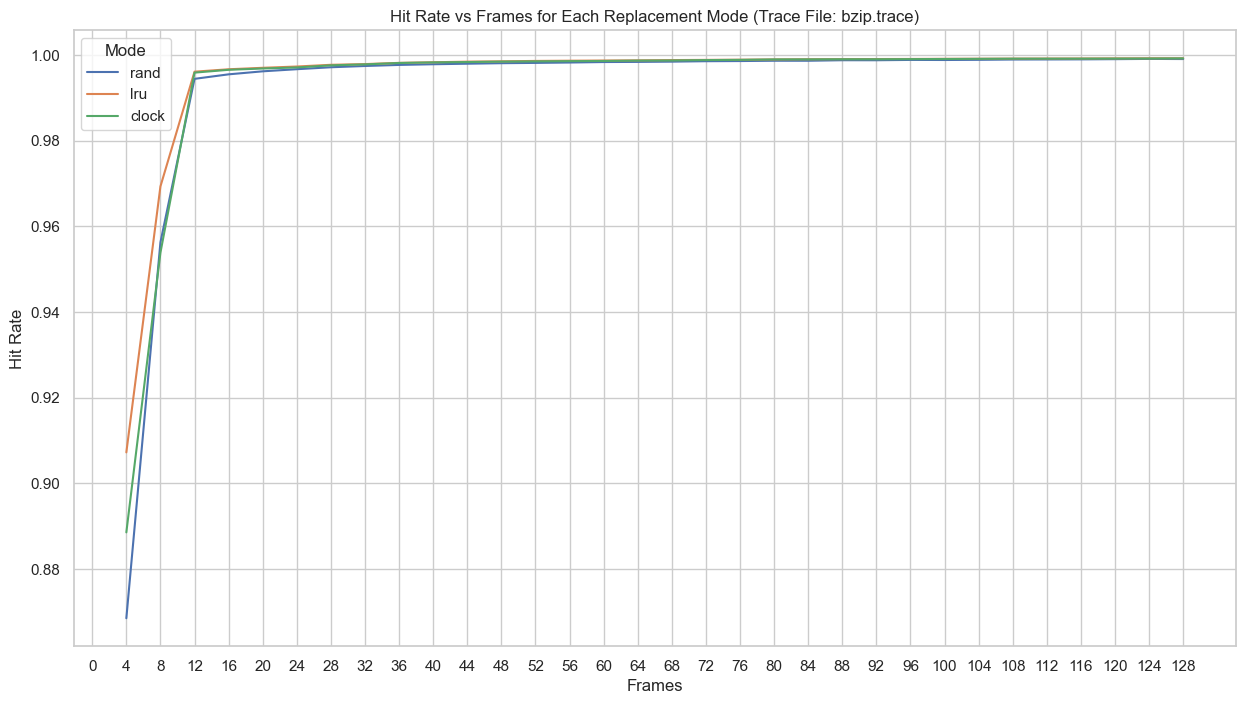

In [6]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(15, 8))
sns.lineplot(x='Frames', y='Page Hit', hue='Mode', data=df)

plt.xlabel('Frames')
plt.ylabel('Hit Rate')
plt.title('Hit Rate vs Frames for Each Replacement Mode (Trace File: bzip.trace)')

frame_max = df['Frames'].max()
plt.xticks(range(0, frame_max + 1, 4))  # range(0, max_frame, step=4)

plt.show()

In [8]:
df

,Frames,Page Hit,Exec Time,Mode
0,4,0.868513,0.587749,rand
1,8,0.956253,0.501031,rand
2,12,0.994422,0.460020,rand
3,16,0.995474,0.461239,rand
4,20,0.996178,0.470727,rand
...,...,...,...,...
91,112,0.999132,0.969715,clock
92,116,0.999138,0.933106,clock
93,120,0.999153,0.880106,clock
94,124,0.999163,1.087667,clock
